### Plot heatmap and trajectories

In [1]:
BiocManager::install('ComplexHeatmap')

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Installing package(s) 'ComplexHeatmap'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'ape', 'backports', 'bayesplot', 'BH', 'bit', 'blob', 'boot',
  'broom', 'callr', 'carData', 'caret', 'caTools', 'checkmate', 'class',
  'crosstalk', 'dbplyr', 'dplyr', 'ellipse', 'ellipsis', 'fansi', 'farver',
  'forcats', 'foreach', 'fs', 'ggfortify', 'ggplot2', 'ggpubr', 'glmnet',
  'gower', 'haven', 'hexbin', 'hms', 'htmltools', 'httpuv', 'KernSmooth',
  'knitr', 'later', 'lattice', 'lava', 'lifecycle', 'loo', 'lubridate',
  'maptools', 'MASS', 'matrixStats', 'mime', 'ModelMetrics', 'modelr',
  'mongolite', 'nlme', 'nnet', 'odbc', 'openssl', 'padr', 'pillar', 'pkgbuild',
  'pkgload', 'PKI', 'plyr', 'prettyunits', 'processx', 'promises', 'ps',
  'purrr', 'quantmod', 'quantreg', 'Rcpp', 'RCurl', 'recipes', 'repr',
  'reshape2', 'rex', 'rJava', 'RJDBC', 'RJSONIO', 'rmarkdown', 'rsta

In [2]:
library(ggplot2)
library(ggpubr)
library(reshape2)
library(gridExtra)
library(circlize)
library(ComplexHeatmap)

Loading required package: magrittr

circlize version 0.4.10
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.




In [3]:
load('trimmed-150nts/correlation-analysis/processed_data.RData')
load('trimmed-150nts/correlation-analysis/cor_lag.RData')
bac_selected_info <- read.csv('trimmed-150nts/correlation-analysis/selected_microbes_info.txt', sep='\t', stringsAsFactors=F)
bac_selected <- bac_selected_info$names[!duplicated(bac_selected_info$names)]

In [4]:
chem_names <- c("pH","COD","PhosphorousR","PhosphorousT" ,"AmmoniaN", 
                "Alkalinity","NitrateN", "NitrogenT" ,"Volatile.Fatty.Acids" ,"TSS.VSS")
color <- c('black', 'red', 'blue', 'green')
di_names <- c('DI1', 'DI2', 'DI3', 'DI4')

In [5]:
bac_selected <- sort(bac_selected)
rownames(taxa) <- taxa$names
taxa_selected <- taxa[bac_selected, ]
assignment <- as.character(taxa[bac_selected, ]$assignment)
assignment <- sapply(1:length(assignment),function(j){
  splitt <- unlist(strsplit(assignment[j], "; "))
  splitt <- splitt[nchar(splitt)>3]
  len <- length(splitt)
  highest <- splitt[len]
  rank <- substring(highest, 1, 1)
  if(rank == 'g'){
    rank = 'genus:'
  } else if(rank == 'k'){
    rank = 'kingdom:'
  } else if(rank == 'c'){
    rank = 'class:'
  } else if(rank == 'o'){
    rank = 'order:'
  }else if(rank == 's'){
    rank = 'species:'
  }else{
    rank=='unknown'
  }
  namee <- substring(highest, 4)
  paste(rank, namee)
})
taxa_selected$assi_high <- assignment
taxa_selected <- taxa_selected[order(taxa_selected$phylum),]
assignment <- taxa_selected$assi_high
bac_selected <- taxa_selected$names

In [6]:
#extract legend
g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}

plot 10 chemical trajectories

In [7]:
plist <- list()
m <- 1
for(n in 1:length(chem_names)){
  chem_temp <- data.frame(chem_all[[1]][, n], chem_all[[2]][, n], chem_all[[3]][, n], chem_all[[4]][, n])
  colnames(chem_temp) <- di_names
  chem_temp$day <- as.numeric(rownames(chem_temp))
  ymin <- min(chem_temp)
  ymax <- max(chem_temp)
  df <- melt(chem_temp ,  id.vars = 'day', variable.name = 'digester')
  plist[[m]]<- ggplot(df, aes(day,value)) + 
    geom_line(aes(colour = digester))+
    scale_color_manual(values=color)+
    ylab(chem_names[n])+
    theme(axis.text=element_text(size=6),
          axis.title=element_text(size=8))
  mylegend<-g_legend(plist[[m]])
  plist[[m]] <- plist[[m]] + theme(legend.position="none")
  m <- m+1
} 

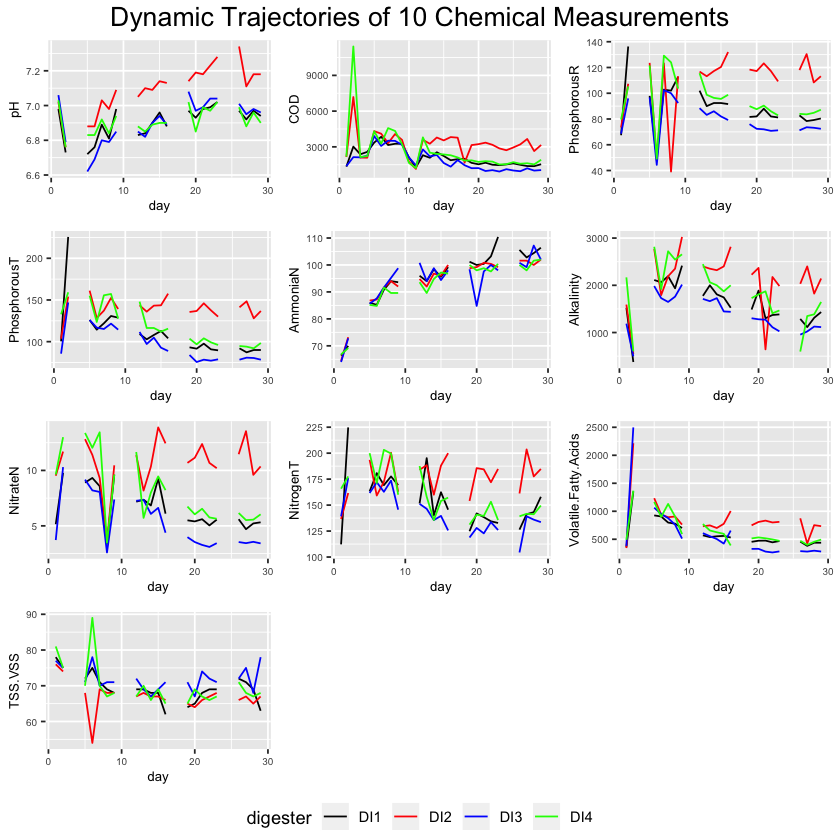

In [8]:
figure <- ggarrange(plotlist = plist, ncol=3, nrow=4, common.legend = TRUE, legend="bottom")
annotate_figure(figure,
                top = text_grob("Dynamic Trajectories of 10 Chemical Measurements", color = "black", size = 16))

plot selected microbes' trajectories

In [9]:
plist <- list()
m <- 1
for(n in 1:length(bac_selected)){
  bac_temp <- data.frame(bac_all[[1]][, bac_selected[n]], bac_all[[2]][, bac_selected[n]], bac_all[[3]][, bac_selected[n]], bac_all[[4]][, bac_selected[n]])
  colnames(bac_temp) <- di_names
  bac_temp$day <- as.numeric(rownames(bac_temp))
  ymin <- min(bac_temp)
  ymax <- max(bac_temp)
  df <- melt(bac_temp ,  id.vars = 'day', variable.name = 'digester')
  plist[[m]]<- ggplot(df, aes(day,value)) + 
    geom_line(aes(colour = digester))+
    scale_color_manual(values=color)+
    ylab(assignment[n])+
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=8))
  mylegend<-g_legend(plist[[m]])
  plist[[m]] <- plist[[m]] + theme(legend.position="none")
  m <- m+1
} 

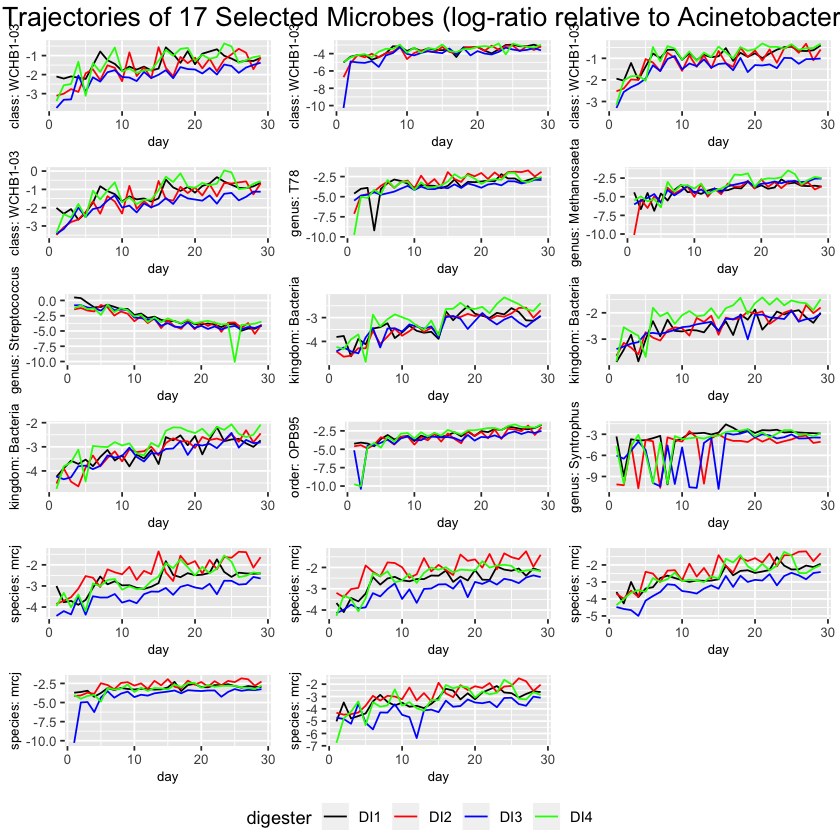

In [10]:
figure <- ggarrange(plotlist = plist, ncol=3, nrow=6, common.legend = TRUE, legend="bottom")
annotate_figure(figure,
                top = text_grob("Dynamic Trajectories of 17 Selected Microbes (log-ratio relative to Acinetobacter spike-in)", color = "black", size = 16))

generate cross-correlation and time-lag heatmap

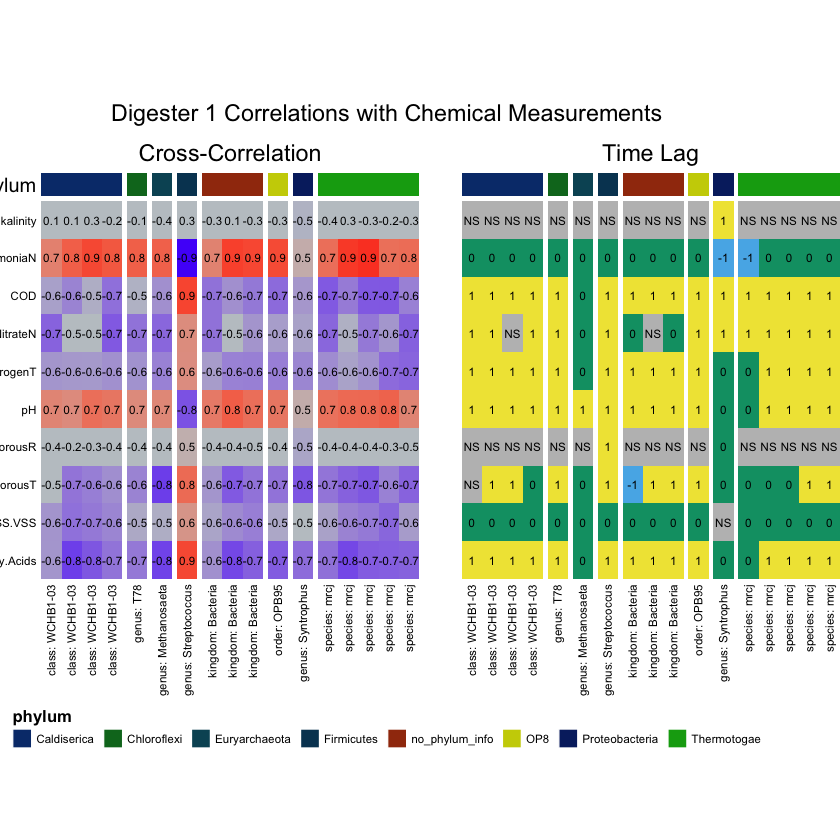

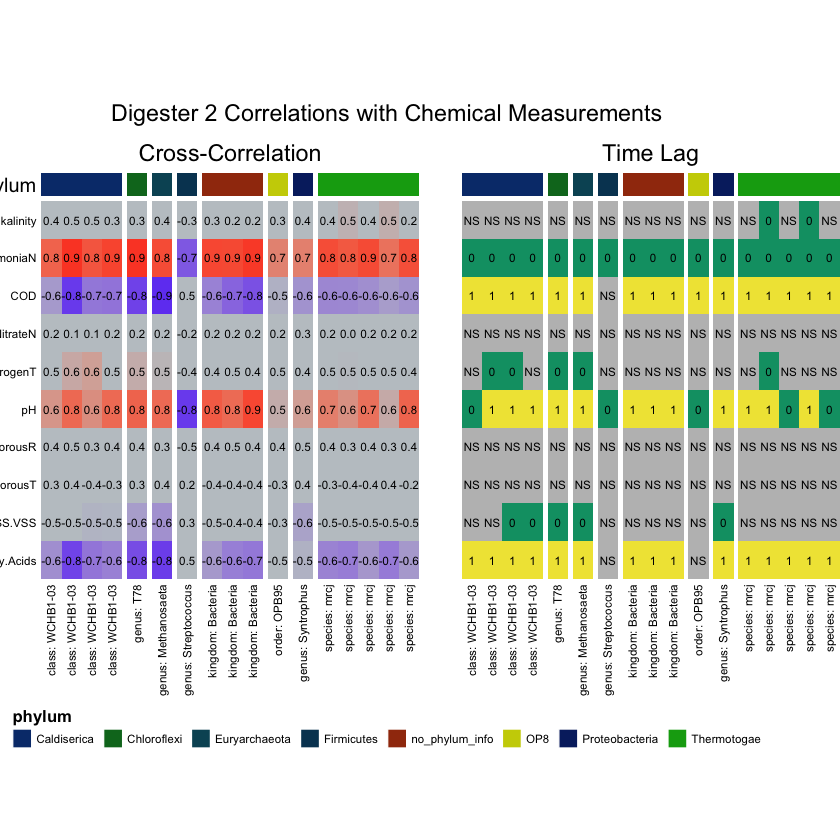

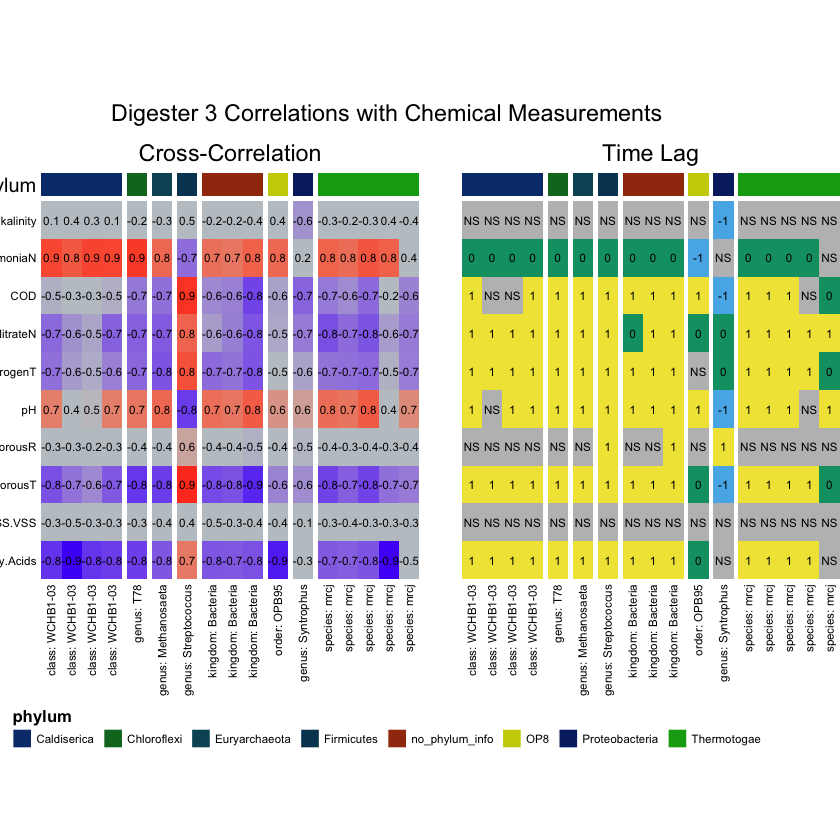

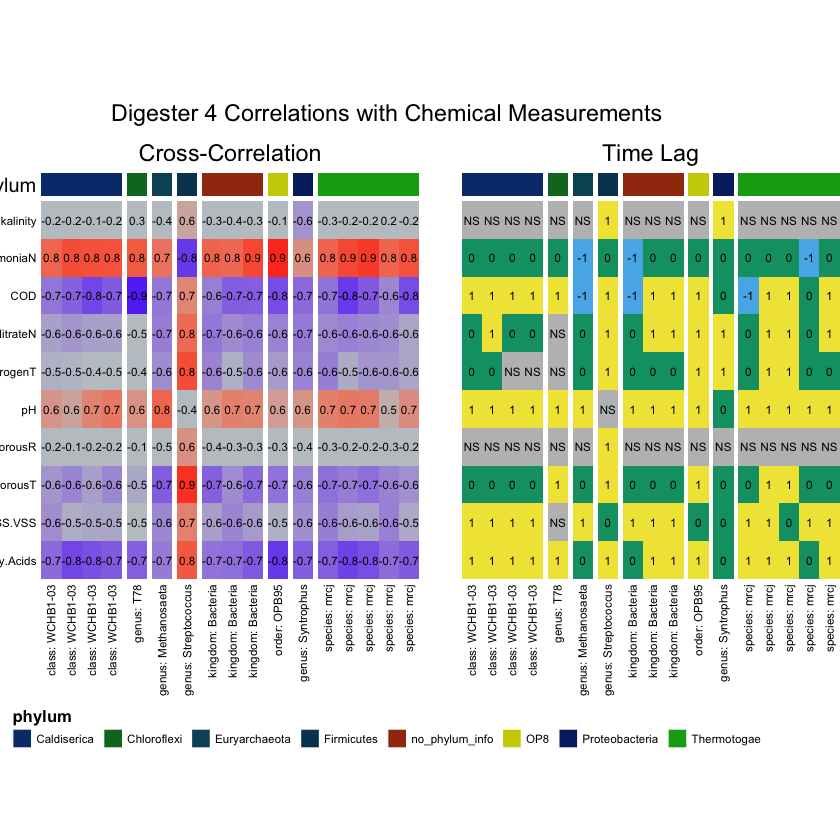

In [11]:
for(i in 1:4){
  co_temp <- corr[[i]]
  cor_hm <- co_temp[bac_selected, ]
  
  cor_hm$phylum <- taxa[bac_selected, ]$phylum
  hm1 <- t(as.matrix(cor_hm[-11]))
  colnames(hm1) <- assignment
  col_fun = colorRamp2(c(-1, -0.5,0.5, 1), c("blue", '#C0C6CB','#C0C6CB',"red"))
  set.seed(111)
  h1 <- Heatmap(hm1, name = "cor", col = col_fun,
                column_split = cor_hm$phylum,
                column_title = 'Cross-Correlation',
                row_names_gp = gpar(fontsize = 7),
                column_names_gp = gpar(fontsize = 7),
                width = unit(8, "cm"),
                height = unit(8
                              ,'cm'),
                column_gap = unit(1, "mm"),
                row_order = order(colnames(co_temp)),
                row_names_side = "left",
                column_order = order(cor_hm$phylum), row_title_rot = 0,
                top_annotation = HeatmapAnnotation(phylum = cor_hm$phylum, annotation_name_side = "left",
                                                   annotation_legend_param = list(labels_gp = gpar(fontsize = 7)),
                                                   show_legend = FALSE),
                #top_annotation = HeatmapAnnotation(foo = anno_block(labels = names(table(cor_hm$phylum)), 
                #                                                    labels_gp = gpar(col = "black", fontsize = 5))),
                cell_fun = function(j, i, x, y, width, height, fill) {
                  grid.text(sprintf("%.1f", hm1[i, j]), x, y, gp = gpar(fontsize = 7))})
  
  lag_temp <- lagg[[i]]
  lag_hm <- lag_temp[bac_selected, ]
  lag_hm <- apply(lag_hm, 2, as.character)
  co_temp <- corr[[i]]
  cor_hm <- co_temp[bac_selected, ]
  
  lag_hm[abs(cor_hm)< 0.5] <- 'NS'
  lag_hm <- as.data.frame(lag_hm)
  lag_hm$phylum <- taxa[bac_selected, ]$phylum
  hm2 <- t(as.matrix(lag_hm[-11]))
  colnames(hm2) <- assignment
  col_fun = structure(c("#56B4E9", "#009E73", "#F0E442",'grey'), names=c('-1','0','1', 'NS'))
  #"#00AFBB", "#E7B800", "#FC4E07"
  set.seed(111)
  h2 <- Heatmap(hm2, name = "lag", col = col_fun, na_col = "grey",
                column_split = lag_hm$phylum,
                column_title = 'Time Lag',
                row_names_gp = gpar(fontsize = 7),
                column_names_gp = gpar(fontsize = 7),
                width = unit(8, "cm"),
                height = unit(8,'cm'),
                column_gap = unit(1, "mm"),
                row_order = order(colnames(lag_temp)),
                row_names_side = "left",
                column_order = order(lag_hm$phylum), row_title_rot = 0,
                top_annotation = HeatmapAnnotation(phylum = lag_hm$phylum,
                                                   annotation_legend_param = list(phylum = list(labels_gp = gpar(fontsize = 7),
                                                                                                direction = "horizontal", nrow=1))),
                cell_fun = function(j, i, x, y, width, height, fill) {
                  grid.text(sprintf( hm2[i, j]), x, y, gp = gpar(fontsize = 7))})
  
  draw(h1+h2, annotation_legend_side = "bottom", 
       column_title = paste('Digester',i,'Correlations with Chemical Measurements'))
}